In [1]:
import common
from imdb import IMDb
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import json

In [2]:
from download_submissions import pprint_tree

In [3]:
submissions = common.load_submissions("./2018-2019_solved_movies/")

In [7]:
s = submissions[2]

In [8]:
for s in submissions:
    if s.id == "bp3ntm":
        break

In [9]:
# one submission for testing
s
print(s.selftext)

 I watched this movie in a tv channel about 3-4 years ago. I dont know the exact date. Im not a native english speaker so i will try my best to explain the pilot. It's a movie about "What if men and women change places?". Main Star is a man -not so sure but i remember he was wearing a red hijab or something like that- who wants to do something but cant because its a women job. 

 \-spoiler-

 

 There is a twist at the end which reveals that the main dictator's daugther is actually a man and main star and him gets married and makes the world a better place. 

&#x200B;

I hope i gave enough information. Please, any help will be appreciated. I tried using google but i cannot find it.


In [10]:
comments = s.comments.list()
for comment in comments:
        if comment.is_submitter or (comment.author and comment.author.name in common.user_blacklist):
            print("NO!", comment.body)
        else:
            print("YES!", comment.body)

YES! [Jacky au royaume des filles](https://www.imdb.com/title/tt2382422) (2014) aka Jacky in the Kingdom of Women
NO! SOLVED!
NO! You have been given one point for this answer.  
  Thanks for contributing!  

  ^^^Akedah ^^^awarded ^^^to ^^^Bidibule ^^^\(154\)


In [11]:
comments[2].author.name

'WhatIsThisBot'

In [4]:
# Remove comments by authors in blacklist or if author is submitter or None
def remove_blacklist_top_comment(submission):
    comments = submission.comments.list()
    filtered_comments = []
    for comment in comments:
        if comment.is_submitter:
            continue
        if comment.author is None:
            continue
        if comment.author.name in common.user_blacklist:
            continue
        
        filtered_comments.append(comment)
    return filtered_comments

lens = []
selected_subs = []
for s in submissions:
    lens.append(len(remove_blacklist_top_comment(s)))
    if len(remove_blacklist_top_comment(s)) == 1:
        selected_subs.append(s)

In [13]:
#submissions without author comments and bot/mod comments with length 1. 
print(len(selected_subs))


5827


(array([2.0127e+04, 1.2300e+02, 3.4000e+01, 1.8000e+01, 9.0000e+00,
        4.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <a list of 10 Patch objects>)

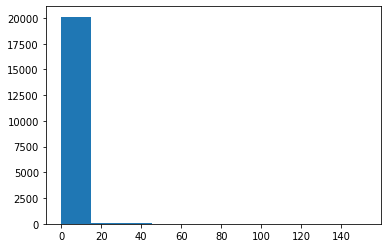

In [14]:
plt.hist(lens)

In [15]:
sum(l == 1 for l in lens)

5827

In [16]:
print(s)

cjn6tt


In [5]:
def filter_submission(submission):
    # return True if this is what we want
    # i.e with only one reply *with* an imdb link in the response
    comments = submission.comments.list()
    for comment in comments:
        replies = comment.replies.list()
        for reply in replies:
            if 'imdb.com' in comment.body:
                imdb_id = comment.body[comment.body.rfind('/title/') + 9:comment.body.rfind('/title/') + 16]
                return True, imdb_id
            else:
                return False, None

In [18]:
# Input for filter_submissions is a submission. returns boolean and imdb_id if contains imdb link
boolean, imdb_id = filter_submission(selected_subs[0])
boolean, imdb_id
#print([s.body for s in s.comments])

(True, '1794147')

In [21]:
cast = movie['cast']
# example imdb link
#https://www.imdb.com/title/tt2382422
#for c in cast:
 #   print(c['name'])

In [22]:
# Takes imdb id from imdb link
st = "fefjlkeajflkjelkj https://www.imdb.com/title/tt0091223/reference fjkalkeaj"
i = st[st.rfind('/title/') + 9:st.rfind('/title/') + 16]
i

'0091223'

In [6]:
# create an instance of the IMDb class
ia = IMDb()
    
    
# get a movie
movie = ia.get_movie('2382422')

print('Titles:')
print(movie['plot'])
# print the names of the directors of the movie
print('Directors:')
for director in movie['directors']:
    print(director['name'])

# print the genres of the movie
print('Genres:')
for genre in movie['genres']:
    print(genre)

# search for a person name
people = ia.search_person('Mel Gibson')
for person in people:
   print(person.personID, person['name'])


Titles:
["In the Kingdom of Bubunne, women are in power while men wear veils and do domestic tasks. Jacky, a lovely young man who dreams of marrying the 'Colonelle' has to struggle like a Cinderella to realize his dreams.::Rotterdam Film Festival"]
Directors:
Riad Sattouf
Genres:
Comedy
0000154 Mel Gibson
2153167 Mel Gibson
0317112 Mel Gibson
3323885 Adam Taylor
2800055 Mel Gibson
3742421 Melina Mari Bryant   nickname
0317195 Terel Gibson
0316878 Cal Gibson
0316945 Donal Gibson
4047961 Noel Gibson
2106809 Raquel Gibson
3912400 Jamel Gibson
0316950 E.L. Gibson
10402197 Daniel Gibson
2798174 Daniel Gibson
2988370 Mal Gibson
9235742 Daniel Gibson
7454542 L. Gibson
1270944 Paul Gibson
8222588 Rachel Gibson


In [7]:
def movie_info(boolean, imdb_id):
    information_list = {}
    # check if imdb link present, 
    # using api: get plot/title/genres/cast/synopsis in a list
    try:
        if boolean == True:
            if ia.get_movie(imdb_id):
                if ia.get_movie(imdb_id) == 'to the ':
                    pass
                movie = ia.get_movie(imdb_id)
                if movie.get('plot'):
                    information_list.update({'Plot: ':movie.get('plot')})
                #if not movie.get('cast'):
                #    continue
                if movie.get('cast'):
                    for actor in movie['cast']:
                        persons = {'Name: ': actor.data['name'], 'id: ': actor.personID}
                        information_list.update(persons)
                if movie.get('title'):
                    information_list.update({'Title: ':movie['title']})
                if movie.get('genre'):
                    information_list.update({'Genre: ':movie['genre']})
                if movie.get('synopsis'):
                    information_list.update({'Synopsis: ':movie.get('synopsis')})
                return information_list
    except:
        pass

In [99]:
# Print boolean, imdb_id and plot|title|genre for movies. 
for s in selected_subs[:5]:
    #print(filter_submission(s))
    print(movie_info(filter_submission(s)[0], filter_submission(s)[1]))

{'Plot: ': ["Full of new relationships, salacious temptations and make-it-or-break it decisions, the series' coming-of-age dwellers grapple with life's defining moments as they deal with the unreality of the show-biz industry.::Bell Media"], 'Name: ': 'Michael Kash', 'id: ': '1733554', 'Title: ': 'The L.A. Complex', 'Genre: ': ['Drama'], 'Synopsis: ': ['Highland Gardens follows the ins and outs of an apartment-style motel in LA which draws aspiring Canadian hopefuls looking for a place to rest their heads while they chase their Hollywood dreams.']}
None
None
{'Plot: ': ["Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs into Madeleine, as beautiful as she is brusque, a concrete block of tensed muscles and doomsday prophecies.", "Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs into Madeleine, as beautiful as she is brusque, a concrete block of tensed musc

In [79]:
movie_info(filter_submission(s)[0], filter_submission(s)[1])

In [84]:
print(filter_submission(s)[1])

None


In [29]:
ia.update(movie, info=['plot', 'main'])

In [14]:
print(movie.get('cast'))

[<Person id:3228320[http] name:_Vincent Lacoste_>, <Person id:0001250[http] name:_Charlotte Gainsbourg_>, <Person id:0099828[http] name:_Didier Bourdon_>, <Person id:0031785[http] name:_Anémone_>, <Person id:0094993[http] name:_Valérie Bonneton_>, <Person id:0371890[http] name:_Michel Hazanavicius_>, <Person id:0527852[http] name:_Noémie Lvovsky_>, <Person id:0550341[http] name:_Laure Marsac_>, <Person id:4473893[http] name:_William Lebghil_>, <Person id:3226187[http] name:_Anthony Sonigo_>, <Person id:4280460[http] name:_India Hair_>, <Person id:3554909[http] name:_Béatrice de Staël_>, <Person id:3529042[http] name:_Frédéric Neidhardt_>, <Person id:4422007[http] name:_Anamaria Vartolomei_>, <Person id:0000420[http] name:_Valeria Golino_>, <Person id:0222922[http] name:_Emmanuelle Devos_>, <Person id:3176551[http] name:_Riad Sattouf_>, <Person id:5367780[http] name:_Ida Février_>, <Person id:4943565[http] name:_Olga Milshtein_>, <Person id:6270175[http] name:_Nia Bezarashvili_>, <Perso

In [8]:
# Take all imdb submissions and add them to list imdb_related
def make_dict1(submissions):
    dict1 = list()
    for s in submissions:
        if filter_submission(s) == None:
            continue
        if filter_submission(s)[0] == False:
            continue
        #imdb_related.append((movie_info(filter_submission(s)[0], filter_submission(s)[1])))
        #values = {'Submission_id: ': s.id, 'Imdb id: ': filter_submission(s)[1], 'Submission title: ': s.title, 'Context: ': s.selftext}
        values = {'Submission_id: ': s.id, 'Imdb id: ': filter_submission(s)[1], 'Submission title: ': s.title, 'Context: ': s.selftext}
        #dict1.update({'Submission_id: ': s.id, 'Imdb id: ': filter_submission(s)[1], 'Submission title: ': s.title, 'Context: ': s.selftext})
        dict1.append(values)
    return dict1   


def make_dict2(submissions):
    imdb_related = {}
    final_dict = list()
    counter = 0
    for s in submissions:
        #print(i)
        filtered_submission = filter_submission(s)
        # check if filter submission returns None
        if filtered_submission == None:
            continue
        # check if imdb_id is not None for imdb link in body
        if filtered_submission[1] == None:
            continue
        # check if imdb link is present in comment.body
        if filtered_submission[0] == False:
            continue
        movie_information = (movie_info(filtered_submission[0], filtered_submission[1]))
        if not movie_information:
            continue
        #imdb_related.update(movie_information)
        imdb_dict2 = {'Imdb id: ': filtered_submission[1], 'Information: ': movie_information}
        # from tuple to dict for json
        final_dict.append(imdb_dict2)
        counter = counter + 1
        print(counter)
    return final_dict

In [14]:
#imdb_dict1 = make_dict1(selected_subs)
imdb_dict2 = make_dict2(selected_subs)
#imdb_dict2_1 = make_dict2(selected_subs[:5])
#print(len(selected_subs))
#make_dict2(selected_subs[150:180])
#print(filter_submission(selected_subs[942]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


2020-03-03 16:48:55,125 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "to the ": invalid literal for int() with base 10: \'to the \'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'to the '


153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211


2020-03-03 16:55:02,025 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "\n\nToo B": invalid literal for int() with base 10: \'\\n\\nToo B\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: '\n\nToo B'


212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268


2020-03-03 17:01:35,451 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt1336619/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': timeout('The read operation timed out')},); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 220, in retrieve_unicode
    content = response.read()
  File "/home/buck/anaconda3/lib/python3.7/http/client.py", line 464, in read
    return self._readall_chunked()
  File "/home/buck/anaconda3/lib/python3.7/http/client.py", line 574, in _readall_chunked
    value.append(self._safe_read(chunk_left))
  File "/home/buck/anaconda3/lib/python3.7/http/client.py", line 620, in _safe_read
    chunk = self.fp.read(min(amt, MAXAMOUNT))
  File "/home/buck/anaconda3/lib/python3.7/socket.py", line 589, i

269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


2020-03-03 17:03:49,610 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "llanes]": invalid literal for int() with base 10: \'llanes]\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'llanes]'


290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430


2020-03-03 17:18:33,369 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "ors  \nh": invalid literal for int() with base 10: \'ors  \\nh\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'ors  \nh'


431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532


2020-03-03 17:29:23,996 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "\nhttps:": invalid literal for int() with base 10: \'\\nhttps:\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: '\nhttps:'
2020-03-03 17:29:24,101 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "shinsab": invalid literal for int() with base 10: \'shinsab\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'shinsab

533
534
535
536
537
538
539
540
541
542
543
544
545


2020-03-03 17:30:45,664 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "check h": invalid literal for int() with base 10: \'check h\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'check h'


546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630


2020-03-03 17:39:29,251 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "check t": invalid literal for int() with base 10: \'check t\'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'check t'


631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703


2020-03-03 17:46:57,487 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "Scene: ": invalid literal for int() with base 10: \'Scene: \'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'Scene: '


704
705
706
707
708
709
710
711
712
713
714
715


2020-03-03 17:48:11,959 CRITICAL [imdbpy] /home/buck/anaconda3/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "d work ": invalid literal for int() with base 10: \'d work \'',); kwds: {}
Traceback (most recent call last):
  File "/home/buck/anaconda3/lib/python3.7/site-packages/imdb/parser/http/__init__.py", line 297, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'd work '


716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783


In [13]:
print(len(imdb_dict2))
print(imdb_dict2)

3
[{'Imdb id: ': '1794147', 'Information: ': {'Plot: ': ["Full of new relationships, salacious temptations and make-it-or-break it decisions, the series' coming-of-age dwellers grapple with life's defining moments as they deal with the unreality of the show-biz industry.::Bell Media"], 'Name: ': 'Michael Kash', 'id: ': '1733554', 'Title: ': 'The L.A. Complex', 'Genre: ': ['Drama'], 'Synopsis: ': ['Highland Gardens follows the ins and outs of an apartment-style motel in LA which draws aspiring Canadian hopefuls looking for a place to rest their heads while they chase their Hollywood dreams.']}}, {'Imdb id: ': '3204144', 'Information: ': {'Plot: ': ["Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs into Madeleine, as beautiful as she is brusque, a concrete block of tensed muscles and doomsday prophecies.", "Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs 

In [85]:
superli = list()
dict1 = {'yes: ': 1, 'no: ': 0}
superli.append(dict1)
print(superli)
dict2 = {'yes: ': 2, 'no: ': 3}
superli.append(dict2)
print(superli)


[{'yes: ': 1, 'no: ': 0}]
[{'yes: ': 1, 'no: ': 0}, {'yes: ': 2, 'no: ': 3}]


In [95]:
print(len(imdb_dict2))
#imdb_dict2_3 = make_dict2(selected_subs[2001:3000])
#imdb_dict2_4 = make_dict2(selected_subs[3001:4000])
#imdb_dict2_5 = make_dict2(selected_subs[4001:5000])
#imdb_dict2_6 = make_dict2(selected_subs[5001:])

34


In [ ]:
if imdb_dict2['Information: '][len(imdb_related) - 1][2]:
            print(imdb_dict2['Information: '][len(imdb_related) - 1][2])
            #persons = [{'name': i.data['name'], 'id': i.personID} for i in imdb_dict2['Information: '][len(imdb_related) - 1][3]]
            #imdb_dict2['Information: '][len(imdb_related) - 1] = [i for i in imdb_dict2['Information: '][len(imdb_related) - 1]]
            #imdb_dict2['Information: '][len(imdb_related) - 1][3] = persons

In [9]:
#make_dict2(selected_subs[44:46])
print(selected_subs[45])
x = selected_subs[45]
y = selected_subs[46]
z = selected_subs[47]
a = selected_subs[3]
print(movie_info(filter_submission(a)[0], filter_submission(a)[1]))
print(movie_info(filter_submission(x)[0], filter_submission(x)[1]))
print(movie_info(filter_submission(y)[0], filter_submission(y)[1]))
print(movie_info(filter_submission(z)[0], filter_submission(z)[1]))

d2sco1
(["Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs into Madeleine, as beautiful as she is brusque, a concrete block of tensed muscles and doomsday prophecies.", "Between his friends and the family business, Arnaud's summer looks set to be a peaceful one. Peaceful until he runs into Madeleine, as beautiful as she is brusque, a concrete block of tensed muscles and doomsday prophecies. He expects nothing; she prepares for the worst. He takes things as they come, likes a good laugh. She fights, runs, swims, pushes herself to the limit. Given she hasn't asked him for anything, just how far will he go along with her? It's a love story. Or a story of survival. Or both.::Directors' Fortnight"], 'Love at First Fight', ['Comedy', 'Romance'], [<Person id:1194748[http] name:_Adèle Haenel_>, <Person id:3148447[http] name:_Kévin Azaïs_>, <Person id:0491202[http] name:_Antoine Laurent_>, <Person id:0747690[http] name:_Brigitte

In [177]:
print(len(selected_subs))
print(len(imdb_dict1))
print(len(imdb_dict2))

5827
793
19


In [184]:
print(imdb_dict2)

[{'Imdb id: ': '1794147', 'Information: ': [[["Full of new relationships, salacious temptations and make-it-or-break it decisions, the series' coming-of-age dwellers grapple with life's defining moments as they deal with the unreality of the show-biz industry.::Bell Media"], 'The L.A. Complex', ['Drama'], [{'name': 'Jonathan Patrick Moore', 'id': '1485069'}, {'name': 'Joe Dinicol', 'id': '0227710'}, {'name': 'Cassie Steele', 'id': '1012247'}, {'name': 'Jewel Staite', 'id': '0821612'}, {'name': 'Andra Fuller', 'id': '1822183'}, {'name': 'Kristopher Turner', 'id': '1197529'}, {'name': 'Jordan Johnson-Hinds', 'id': '3045861'}, {'name': 'Ennis Esmer', 'id': '1338828'}, {'name': 'Georgina Reilly', 'id': '2468050'}, {'name': 'Dayle McLeod', 'id': '4560391'}, {'name': 'Michael Levinson', 'id': '5099900'}, {'name': 'Rebecca Dalton', 'id': '4653974'}, {'name': 'Dayo Ade', 'id': '0011747'}, {'name': 'Benjamin Charles Watson', 'id': '2360244'}, {'name': 'Chelan Simmons', 'id': '0799706'}, {'name'

In [16]:
import json

with open('dict1.json', 'w') as fp:
    json.dump(imdb_dict1, fp)

In [17]:
with open('dict2.json', 'w') as fp:
    json.dump(imdb_dict2, fp)

In [18]:
print(json.dumps(dict2.json, indent=4, sort_keys=True))

NameError: name 'dict2' is not defined

In [109]:
for key in imdb_dict2:
    print(key)

{'Imdb id: ': '1794147', 'Information: ': [[["Full of new relationships, salacious temptations and make-it-or-break it decisions, the series' coming-of-age dwellers grapple with life's defining moments as they deal with the unreality of the show-biz industry.::Bell Media"], 'The L.A. Complex', ['Drama'], [{'name': 'Jonathan Patrick Moore', 'id': '1485069'}, {'name': 'Joe Dinicol', 'id': '0227710'}, {'name': 'Cassie Steele', 'id': '1012247'}, {'name': 'Jewel Staite', 'id': '0821612'}, {'name': 'Andra Fuller', 'id': '1822183'}, {'name': 'Kristopher Turner', 'id': '1197529'}, {'name': 'Jordan Johnson-Hinds', 'id': '3045861'}, {'name': 'Ennis Esmer', 'id': '1338828'}, {'name': 'Georgina Reilly', 'id': '2468050'}, {'name': 'Dayle McLeod', 'id': '4560391'}, {'name': 'Michael Levinson', 'id': '5099900'}, {'name': 'Rebecca Dalton', 'id': '4653974'}, {'name': 'Dayo Ade', 'id': '0011747'}, {'name': 'Benjamin Charles Watson', 'id': '2360244'}, {'name': 'Chelan Simmons', 'id': '0799706'}, {'name':

In [108]:
information = imdb_dict2['Information: ']
persons = [{'name': i.data['name'], 'id': i.personID} for i in imdb_dict2['Information: '][0][3]]
imdb_dict2['Information: '][0] = [i for i in imdb_dict2['Information: '][0]]
imdb_dict2['Information: '][0][3] = persons

TypeError: list indices must be integers or slices, not str

In [107]:
for i in information[0][3]:
    #print(i.data['name'], i.personID)
    print(information[0][3])

NameError: name 'information' is not defined

In [83]:
persons = [{'name': i.data['name'], 'id': i.personID} for i in imdb_dict2['Information: '][0][3]]


In [91]:
imdb_dict2['Information: '][0] = [i for i in imdb_dict2['Information: '][0]]

In [92]:
imdb_dict2['Information: '][0][3] = persons

In [93]:
imdb_dict2

{'Imdb id: ': '1794147',
 'Information: ': [[["Full of new relationships, salacious temptations and make-it-or-break it decisions, the series' coming-of-age dwellers grapple with life's defining moments as they deal with the unreality of the show-biz industry.::Bell Media"],
   'The L.A. Complex',
   ['Drama'],
   [{'name': 'Jonathan Patrick Moore', 'id': '1485069'},
    {'name': 'Joe Dinicol', 'id': '0227710'},
    {'name': 'Cassie Steele', 'id': '1012247'},
    {'name': 'Jewel Staite', 'id': '0821612'},
    {'name': 'Andra Fuller', 'id': '1822183'},
    {'name': 'Kristopher Turner', 'id': '1197529'},
    {'name': 'Jordan Johnson-Hinds', 'id': '3045861'},
    {'name': 'Ennis Esmer', 'id': '1338828'},
    {'name': 'Georgina Reilly', 'id': '2468050'},
    {'name': 'Dayle McLeod', 'id': '4560391'},
    {'name': 'Michael Levinson', 'id': '5099900'},
    {'name': 'Rebecca Dalton', 'id': '4653974'},
    {'name': 'Dayo Ade', 'id': '0011747'},
    {'name': 'Benjamin Charles Watson', 'id': '23